### ITAM
## Métodos Numéricos y Optimización 
*(MAT-34420)*
# Práctica 2 
# Álgebra Lineal Numérica

#### Lauro Reyes Rosas - 214532
#### Ximena Paz

## Análisis de Componentes Principales (PCA)

In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# leer datos
data = pd.read_csv('data/winequality-red.csv')

1. Prepara los datos: para cada variable, centra alrededor del cero restando las medias y estandariza la escala dividiendo entre la varianza (np.std). Haz un mapa de calor con la matriz de correlaciones de la base de datos estandarizada.

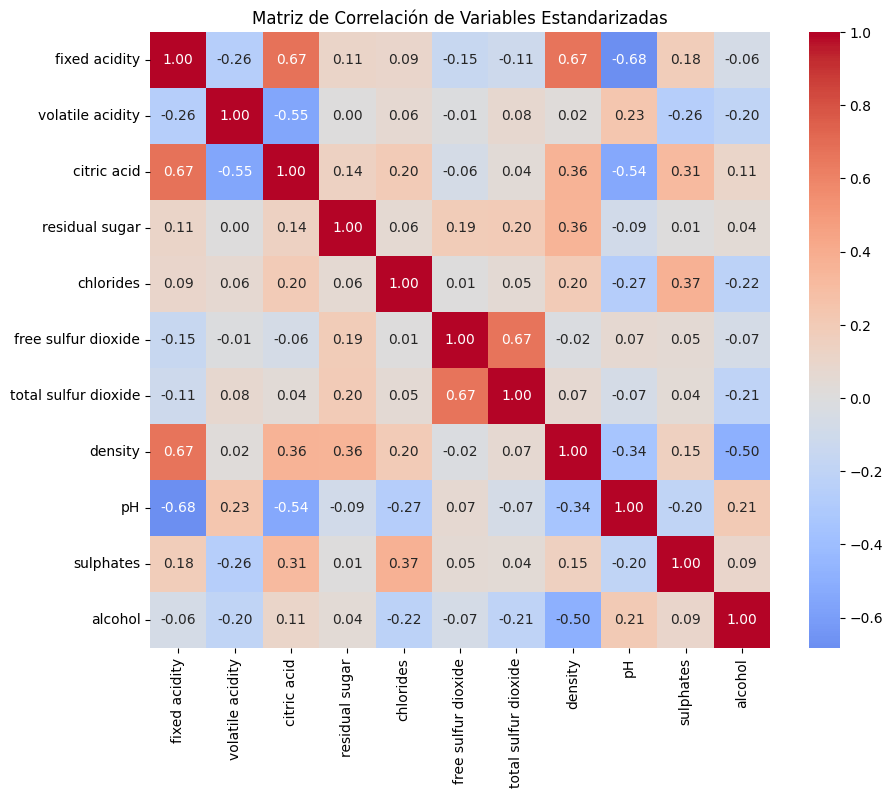

In [2]:
# separar variable objetivo
X = data.drop('quality', axis=1)
y = data['quality']
# standardized
X_standardized = (X - X.mean()) / X.std()
correlation_matrix = X_standardized.corr()
# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de Correlación de Variables Estandarizadas")
plt.show()

2. Realiza la reducción de dimensionalidad mediante PCA calculando los eigenvalores y eigenvectores de la matriz de varianza-covarianza $(A^{T}A)$.

In [3]:
A = X_standardized.values
cov_matrix = np.cov(A.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print("Eigenvalores:")
print(eigenvalues)
print("\nEigenvectores:")
print(eigenvectors)

Eigenvalores:
[3.09913244 1.92590969 1.55054349 1.21323253 0.95929207 0.65960826
 0.58379122 0.4229567  0.34464212 0.18133317 0.05955831]

Eigenvectores:
[[ 0.48931422 -0.11050274 -0.12330157 -0.22961737 -0.08261366  0.10147858
  -0.35022736 -0.17759545  0.19402091 -0.24952314 -0.63969145]
 [-0.23858436  0.27493048 -0.44996253  0.07895978  0.21873452  0.41144893
  -0.5337351  -0.07877531 -0.1291103   0.36592473 -0.0023886 ]
 [ 0.46363166 -0.15179136  0.23824707 -0.07941826 -0.05857268  0.06959338
   0.10549701 -0.37751558 -0.38144967  0.62167708  0.0709103 ]
 [ 0.14610715  0.27208024  0.10128338 -0.37279256  0.73214429  0.04915555
   0.29066341  0.29984469  0.00752295  0.09287208 -0.18402996]
 [ 0.21224658  0.14805156 -0.09261383  0.66619476  0.2465009   0.30433857
   0.37041337 -0.35700936  0.11133867 -0.21767112 -0.05306532]
 [-0.03615752  0.51356681  0.42879287 -0.04353782 -0.15915198 -0.01400021
  -0.11659611 -0.2047805   0.63540522  0.24848326  0.05142086]
 [ 0.02357485  0.5694869

3. Calcula la varianza total acumulada en las primeras k componentes principales.

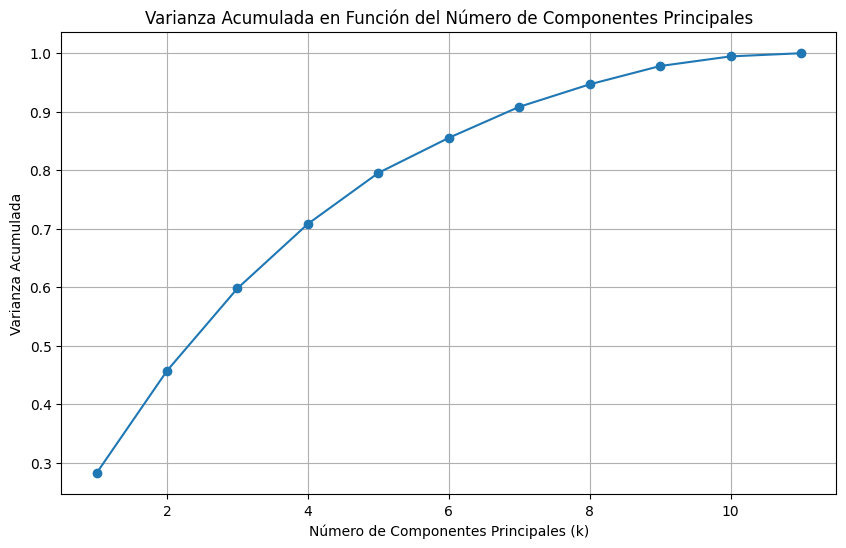

In [4]:
varianza_acumulada_vals = [np.sum(eigenvalues[:k]) / np.sum(eigenvalues) for k in range(1, len(eigenvalues) + 1)]
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), varianza_acumulada_vals, marker='o', linestyle='-')
plt.xlabel("Número de Componentes Principales (k)")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Acumulada en Función del Número de Componentes Principales")
plt.grid(True)
plt.show()

4. Analizando la forma de calcular la proyección $(Y=AV)$, identifica los coeficientes de cada variable en las primeras componentes principales. Discute lo observado: ¿cuáles son las variables que más contribuyen con cada componente? Compara estos resultados con la matriz de correlaciones del paso 1.

In [5]:
correlation_matrix.to_clipboard()

In [6]:
loadings = pd.DataFrame(eigenvectors, columns=[f'CP{i+1}' for i in range(len(eigenvalues))])
loadings.index = X.columns
print("\nCargas de las variables en los primeros dos componentes principales:")
# Análisis de las cargas
loadings_abs = loadings.iloc[:, :3].abs()
# Identificar las variables con mayores cargas en cada componente
for i in range(3):
    component = f'CP{i+1}'
    print(f"\nVariables que más contribuyen a la {component}:")
    print(loadings_abs[component].sort_values(ascending=False).head(3))


Cargas de las variables en los primeros dos componentes principales:

Variables que más contribuyen a la CP1:
fixed acidity    0.489314
citric acid      0.463632
pH               0.438520
Name: CP1, dtype: float64

Variables que más contribuyen a la CP2:
total sulfur dioxide    0.569487
free sulfur dioxide     0.513567
alcohol                 0.386181
Name: CP2, dtype: float64

Variables que más contribuyen a la CP3:
alcohol                0.471673
volatile acidity       0.449963
free sulfur dioxide    0.428793
Name: CP3, dtype: float64


El PCA busca las direcciones (componentes) que capturan la mayor varianza posible en los datos. Las cargas (loadings) de las variables en cada componente indican cuánto contribuye cada variable a esa dirección de máxima varianza.

Incluso si dos variables no están altamente correlacionadas entre sí, pueden contribuir a la misma componente principal si, en combinación, aumentan la varianza explicada por esa componente.

Además, el PCA considera combinaciones lineales de variables. Esto significa que puede capturar patrones de variabilidad que no son evidentes al mirar solo correlaciones bivariadas.

5. Grafica los datos en el(los) plano(s) de las primeras componentes principales, las que hayas elegido de acuerdo al criterio del paso 3. Colorea los puntos con sus categorías correspondientes: diagnóstico, calidad o tipo de actividad, respectivamente. Discute: ¿la reducción de dimensionalidad parece facilitar tareas de clasificación de los datos?

In [7]:
Y = np.dot(A, eigenvectors)
scores = pd.DataFrame(Y, columns=[f'CP{i+1}' for i in range(len(eigenvalues))])
scores['quality'] = y

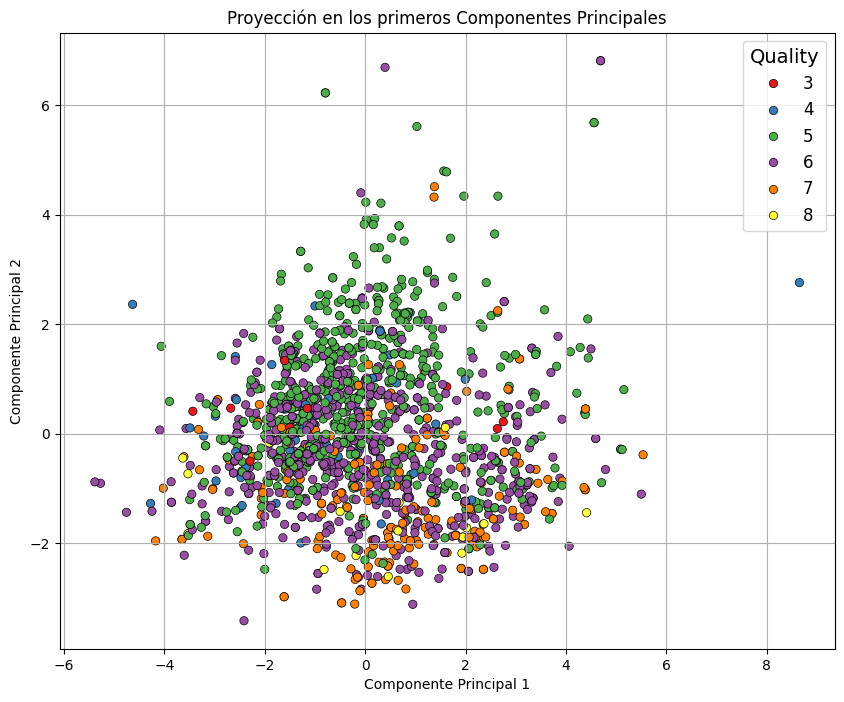

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=scores['CP1'],
    y=scores['CP2'],
    hue=scores['quality'],
    palette='Set1',
    edgecolor='k'
)
plt.title('Proyección en los primeros Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Quality', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()

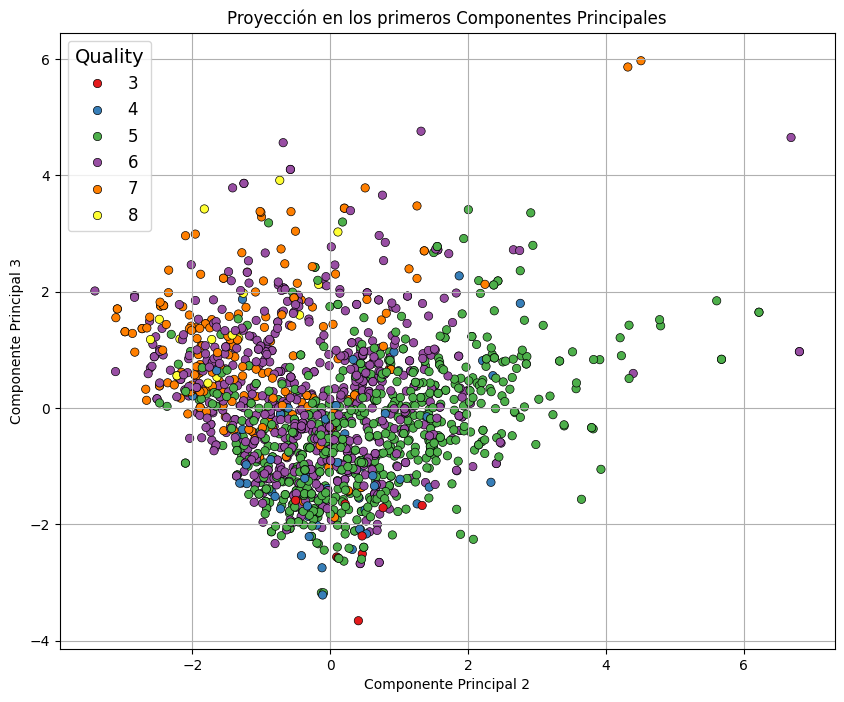

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=scores['CP2'],
    y=scores['CP3'],
    hue=scores['quality'],
    palette='Set1',
    edgecolor='k'
)
plt.title('Proyección en los primeros Componentes Principales')
plt.xlabel('Componente Principal 2')
plt.ylabel('Componente Principal 3')
plt.legend(title='Quality', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()

**¿la reducción de dimensionalidad parece facilitar tareas de clasificación de los datos?** No es muy claro la separación de clases en los primeros componentes pero podemos ver que la clñase 5 y 7 se separan linealmente en los componentes PC2 y PC3

6. Grafica las variables en el espacio latente: el de sus coeficientes en cada una de las componentes principales. Interpreta.

/var/folders/wv/n9lffh7n44scbybpz22gdvh80000gn/T/ipykernel_44691/251195082.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(loadings['CP1'][i], loadings['CP2'][i]),


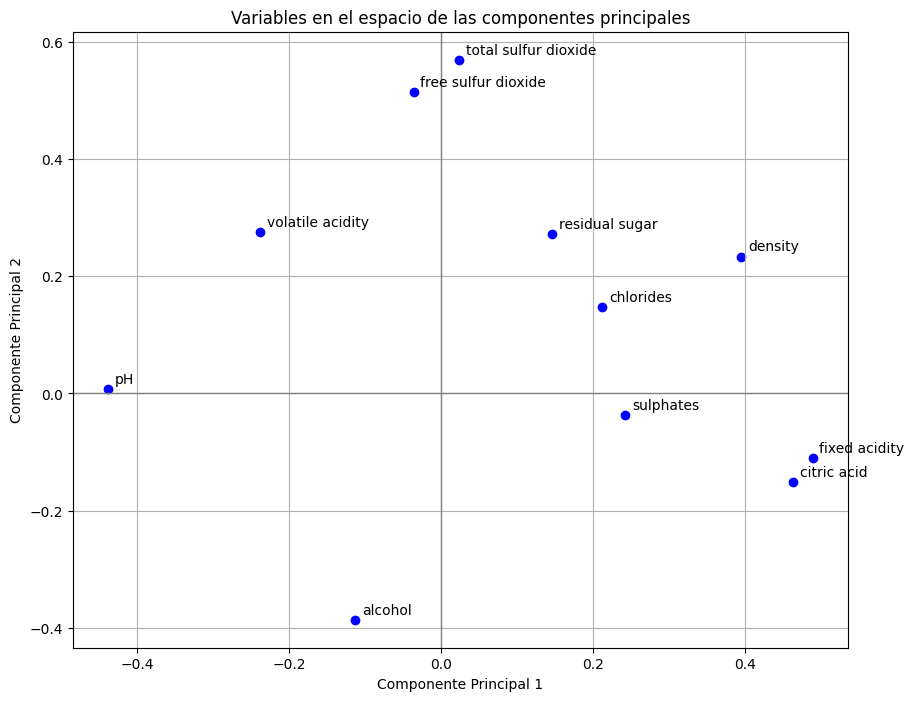

In [13]:
plt.figure(figsize=(10, 8))

# Graficar las cargas de las variables
plt.scatter(loadings['CP1'], loadings['CP2'], color='blue')

# Añadir líneas horizontales y verticales en el origen
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Añadir etiquetas a los puntos
for i, variable in enumerate(loadings[['CP1', 'CP2']].index):
    plt.annotate(variable,
                 xy=(loadings['CP1'][i], loadings['CP2'][i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='left',
                 va='bottom')

plt.title('Variables en el espacio de las componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


/var/folders/wv/n9lffh7n44scbybpz22gdvh80000gn/T/ipykernel_44691/3696570372.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(loadings['CP2'][i], loadings['CP3'][i]),


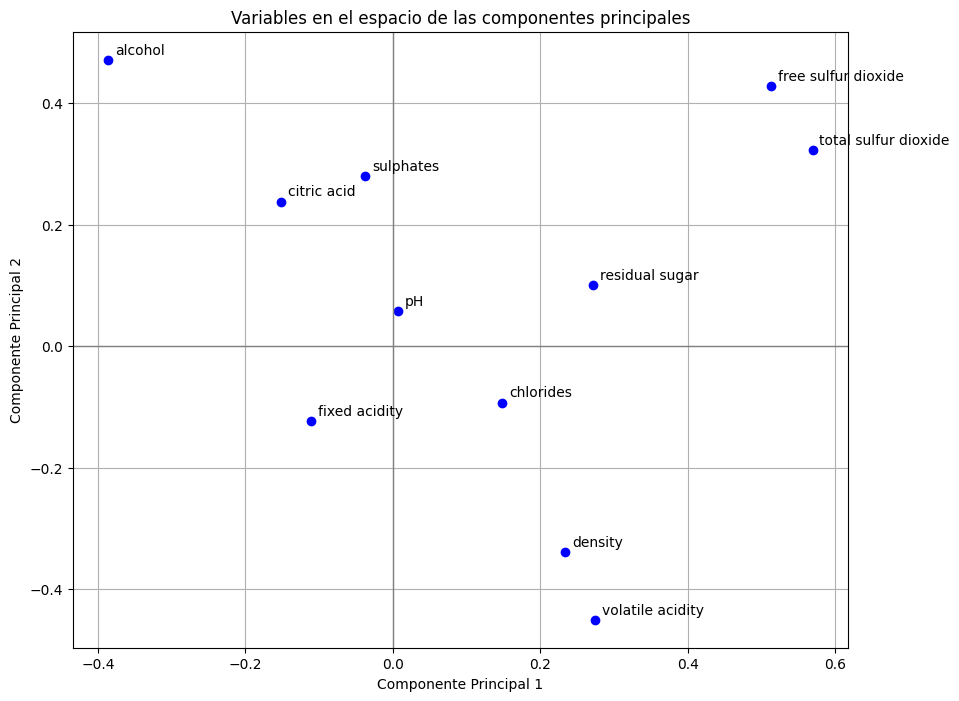

In [14]:
plt.figure(figsize=(10, 8))

# Graficar las cargas de las variables
plt.scatter(loadings['CP2'], loadings['CP3'], color='blue')

# Añadir líneas horizontales y verticales en el origen
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Añadir etiquetas a los puntos
for i, variable in enumerate(loadings[['CP2', 'CP3']].index):
    plt.annotate(variable,
                 xy=(loadings['CP2'][i], loadings['CP3'][i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='left',
                 va='bottom')

plt.title('Variables en el espacio de las componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


In [18]:
# Varianza explicada por componente principal
explained_variance = eigenvalues / np.sum(eigenvalues)

# Contribución de cada variable a cada componente
contributions = loadings**2 * explained_variance[:len(loadings.columns)]

# Normalizar para obtener porcentajes
contributions = contributions.divide(contributions.sum(axis=0), axis=1) * 100

print("\nContribución porcentual de las variables a las primeras tres componentes principales:")
print(contributions.iloc[:, :3])



Contribución porcentual de las variables a las primeras tres componentes principales:
                            CP1        CP2        CP3
fixed acidity         23.942840   1.221086   1.520328
volatile acidity       5.692250   7.558677  20.246628
citric acid           21.495431   2.304062   5.676166
residual sugar         2.134730   7.402766   1.025832
chlorides              4.504861   2.191926   0.857732
free sulfur dioxide    0.130737  26.375087  18.386333
total sulfur dioxide   0.055577  32.431540  10.395111
density               15.630400   5.455751  11.483379
pH                    19.229946   0.004503   0.332898
sulphates              5.901077   0.141030   7.828029
alcohol                1.282150  14.913573  22.247563


In [20]:
contributions.CP1.sum()

99.99999999999999

In [9]:
# Proyección de los datos en las primeras componentes principales
Y = np.dot(A, eigenvectors)
scores = pd.DataFrame(Y, columns=[f'CP{i+1}' for i in range(len(eigenvalues))])
scores['quality'] = y


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores['CP1'], y=scores['CP2'], hue=scores['quality'], palette='Set1')
plt.title('Proyección en las dos primeras Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Quality')
plt.show()

In [ ]:
# Separar la variable objetivo 'quality' de las variables predictoras
X = data.drop('quality', axis=1)
y = data['quality']

# Centrar y estandarizar las variables predictoras
X_standardized = (X - X.mean()) / X.std()

# Matriz de correlaciones de las variables estandarizadas
corr_matrix = X_standardized.corr()

# Mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones de Datos Estandarizados')
plt.show()

In [ ]:

# Convertir los datos estandarizados a una matriz numpy
A = X_standardized.values

# Calcular la matriz de covarianza
cov_matrix = np.cov(A.T)

# Calcular los eigenvalores y eigenvectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar los eigenvalores y eigenvectores en orden descendente
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Mostrar los eigenvalores
print("Eigenvalores:")
for i, val in enumerate(eigenvalues):
    print(f"Componente {i+1}: {val:.4f}")

In [ ]:

# Crear un DataFrame para los eigenvectores (cargas)
loadings = pd.DataFrame(eigenvectors, columns=[f'CP{i+1}' for i in range(len(eigenvalues))])
loadings.index = X.columns

# Mostrar las cargas de las variables en las primeras componentes principales
print("\nCargas de las variables en las primeras tres componentes principales:")
print(loadings.iloc[:, :3])

In [ ]:

# Proyección de los datos en las primeras componentes principales
Y = np.dot(A, eigenvectors)

# Convertir la proyección a un DataFrame
scores = pd.DataFrame(Y, columns=[f'CP{i+1}' for i in range(len(eigenvalues))])

# Añadir la variable objetivo 'quality' para análisis posterior
scores['quality'] = y

In [ ]:

# Gráfica de dispersión de las dos primeras componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores['CP1'], y=scores['CP2'], hue=scores['quality'], palette='Set1')
plt.title('Proyección en las dos primeras Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Quality')
plt.show()

In [ ]:
# Análisis de las cargas (coeficientes) de las variables
loadings_abs = loadings.iloc[:, :3].abs()

# Identificar las variables con mayores cargas en cada componente
for i in range(3):
    component = f'CP{i+1}'
    print(f"\nVariables que más contribuyen a la {component}:")
    print(loadings_abs[component].sort_values(ascending=False).head(3))
